<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_5_5_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preliminaries

Suppose

$$
f: X \rightarrow \mathbb{R}
$$

where $X \subset \mathbb{R}^n$.

Taylor exapansion

$$
f(\boldsymbol {x}+ \boldsymbol {h})=f(\boldsymbol {x})+\nabla f(\boldsymbol {x})\boldsymbol {h} +\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}+o(||{\boldsymbol {h}||}^3).
$$

$\nabla f(\boldsymbol {x})$ is the gradient of the function

$$
\nabla_i f(\boldsymbol {x})=\frac{\partial f}{\partial x_i}
$$

The gradient of $f$ at a point is a vector pointing in the direction of the steepest slope or grade at that point. The steepness of the slope at that point is given by the magnitude of the gradient vector.
$\boldsymbol {H}_{ij}$ is the Hessian - a square matrix of second-order partial derivatives

$$
\boldsymbol {H}_{ij} f(\boldsymbol {x})=\frac{\partial^2 f}{\partial x_i \partial x_j}
$$

$\boldsymbol {H}_{ij}$ is symmetric.

In real application it may be too difficult to calculate hessian analytically and it's calculated using approximation

$$
\boldsymbol {H}(\boldsymbol {x})\boldsymbol {h}\approx \frac{1}{r}\left(\nabla f(\boldsymbol {x}+r\boldsymbol {h})-\nabla f(\boldsymbol {x})\right)
$$

If function has extremum at point $\boldsymbol {x}_0$

$$
\nabla f(\boldsymbol {x}_0)=0
$$

Convex functions

$$
\forall  \boldsymbol {x}_1,\boldsymbol {x}_2 \in X, \quad \forall t\in [0,1] :\quad f\left(t\boldsymbol {x}_1+(1-t)\boldsymbol {x}_2\right)\leq tf(\boldsymbol {x}_1)+(1-t)f(\boldsymbol {x}_2)
$$

Any local minimum of a convex function is also a global minimum. A strictly convex function will have at most one global minimum.

Convex set or a convex region is a subset of a Euclidean space, or more generally an affine space over the reals, that intersects every line into a line segment (possibly empty).

Convex optimization is a subfield of mathematical optimization that studies the problem of minimizing convex functions over convex sets. 

In real application we have to deal with nonconvex fucntions as well.


#Standard form of optimization problem

$$
\begin{aligned}
& \text{minimize}_\boldsymbol{x} \, f(\boldsymbol{x}) \\
& \text{subject to } \qquad
\begin{aligned} 
& g_i(\boldsymbol{x}) \leq 0 \qquad i=1\cdots m \\
& h_j(\boldsymbol{x}) = 0 \qquad j=1\cdots p \\
\end{aligned}
\end{aligned}
$$

where $\boldsymbol{x} \in \mathbb{R}^n$ is the optimization variable, the functions $f,g_1, \cdots,g_m$ are convex and the functions $h_1, \cdots, h_p$ are affine.
In this notation, the function $f$ is the objective function of the problem, and the functions $g_{i}$ and $h_{i}$ are referred to as the constraint functions.

The function f is called, variously, an **objective function**, a **loss function** or **cost (regret) function** (in economy) or an **energy function** or e**nergy functional** (in physics). 
If we want to find maximum of a function it's usually cold a **utility function** or **fitness function**. 

The following are useful properties of convex optimization problems:
* every local minimum is a global minimum;
*  the optimal set is convex;
*  if the objective function is strictly convex, then the problem has at most one optimal point.





#Examples of minimization problems

* statistics (parameter estimation to minimize some loss function)
* regression (find parameters of the line to minimize sum of errors)
* neural networks (find weights to minimize loss function)
* industry management (how to spend money and resources to maximize profit)
* insurance (find insurance coefficients to minimize risk of the loss)
* gambling (minimize losses of casino)
* physics (find trajectory to minimize action)

#Test functions

Over time mathematicians collected a number of pathological functions ([here](https://en.wikipedia.org/wiki/Test_functions_for_optimization) is a handful of them) to test their minimization algorithms on.



One the famous examples is the **Rosenbrock function** -  non-convex function, introduced by Howard H. Rosenbrock in 1960, which is used as a performance test problem for optimization algorithms. It is also known as **Rosenbrock's valley** or **Rosenbrock's banana function**. The function is defined as 

$$
f(x,y)=(a-x)^2+b(y-x^2)^2 \qquad \qquad a=1; b=100
$$

The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_5_5/rosen.png)

Image by https://www.mitchr.me/SS/mjrcalc/lispy/exp-ClassicOptBanana-ART.png.html

In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from sympy import *

x, y = symbols('x y')
expr = (1-x**2)**2+100*(y-x**2)**2


_x = np.linspace(-1.0, 1.2, num=20)
_y = np.linspace(-0.5, 1.5, num=20)
_z = np.array([[expr.evalf(subs={x: X, y: Y}) for X in _x] for Y in _y], dtype=float)


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "xy"}]])


fig.add_trace(go.Surface(x=_x, y=_y, z=_z, opacity=1.0, showscale=False),
              row=1, col=1)

fig.add_trace(go.Contour(z=_z, x=_x, y=_y, contours=dict(showlabels=True)),
              row=1, col=2)

fig.update_layout(width=1200, height=600, autosize=False, title_text="Rosenbrock function",
                  scene=dict(aspectratio = dict(x=1, y=1, z=1)),
                  showlegend=False)
fig.show()

# Function pathologies 

* saddle points

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_5_5/saddle.png)

* long vallies

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_5_5/valley.png)

* noisy data/multiple local minima

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_5_5/rastr.png)

* too steep or too acclivous slopes

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_5_5/camel.jpg)


#Iterative methods

The iterative methods used to solve problems of nonlinear programming differ according to whether they evaluate Hessians, gradients, or only function values.

Methods that evaluate Hessians (or approximate Hessians, using finite differences):
* Newton's method
* Sequential quadratic programming: A Newton-based method for small-medium scale constrained problems. Some versions can handle large-dimensional problems.
* Interior point methods: This is a large class of methods for constrained optimization. Some interior-point methods use only (sub)gradient information and others of which require the evaluation of Hessians.

Methods that evaluate gradients, or approximate gradients in some way (or even subgradients):
* Coordinate descent methods: Algorithms which update a single coordinate in each iteration
* Conjugate gradient methods: Iterative methods for large problems. (In theory, these methods terminate in a finite number of steps with quadratic objective functions, but this finite termination is not observed in practice on finite–precision computers.)
* Gradient descent (alternatively, "steepest descent" or "steepest ascent"): A (slow) method of historical and theoretical interest, which has had renewed interest for finding approximate solutions of enormous problems.
* Subgradient methods - An iterative method for large locally Lipschitz functions using generalized gradients. Following Boris T. Polyak, subgradient–projection methods are similar to conjugate–gradient methods.
* Bundle method of descent: An iterative method for small–medium-sized problems with locally Lipschitz functions, particularly for convex minimization problems. (Similar to conjugate gradient methods)
* Ellipsoid method: An iterative method for small problems with quasiconvex objective functions and of great theoretical interest, particularly in establishing the polynomial time complexity of some combinatorial optimization problems. It has similarities with Quasi-Newton methods.
* Conditional gradient method (Frank–Wolfe) for approximate minimization of specially structured problems with linear constraints, especially with traffic networks. For general unconstrained problems, this method reduces to the gradient method, which is regarded as obsolete (for almost all problems).
* Quasi-Newton methods: Iterative methods for medium-large problems (e.g. N<1000).
* Simultaneous perturbation stochastic approximation (SPSA) method for stochastic optimization; uses random (efficient) gradient approximation.

Methods that evaluate only function values: If a problem is continuously differentiable, then gradients can be approximated using finite differences, in which case a gradient-based method can be used.
* Interpolation methods
* Pattern search methods, which have better convergence properties than the Nelder–Mead heuristic (with simplices), which is listed below.

Besides (finitely terminating) algorithms and (convergent) iterative methods, there are heuristics. A heuristic is any algorithm which is not guaranteed (mathematically) to find the solution, but which is nevertheless useful in certain practical situations.

#Steepest descent methods

**Standard gradient descent**
$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \nabla L(\boldsymbol{x}_{n})
$$

where $\alpha$ is called learning rate. The problem with gradient descent is that it's not adaptive: $\alpha$ is chosen once and for all direction of movement $\nabla L(\boldsymbol{x}_{n})$ doesn't take into account the history.
The problem with $\alpha$ is essentially following

$$
\begin{aligned}
& \text{if } \alpha \text{ is too small} \rightarrow \text{slow convergence} \\
& \text{if } \alpha \text{ is too big} \rightarrow \text{divergence or slow convergence due to overshoots/oscillations} \\
\end{aligned}
$$

| Optimizer | Year | Learning rate $\alpha$ | Gradient $\nabla L$
|----|---|---|---
Standard  GD|1847 | ||
Momentum|1964| |               $\checkmark$ |
AdaGrad |2011| $\checkmark$ |               |
RMSprop |2011| $\checkmark$ |               |
Adadelta|2012| $\checkmark$ |               |
Nesterov|2013| |               $\checkmark$ |
Adam    |2014| $\checkmark$ | $\checkmark$| 
AdaMax  |2015| $\checkmark$ | $\checkmark$|
Nadam   |2015| $\checkmark$ | $\checkmark$|
AMSGrad |2018| $\checkmark$ | $\checkmark$|

Here is a glossary 
$$
\begin{aligned}
\text{AdaGrad} &= \text{adaptive gradient} \\
\text{RMSProp} &= \text{root mean square propagation} \\
\text{Adam} &= \text{adaptive movement} \\
\text{Nadam} &= \text{Nesterov + adam} \\
\text{Adadelta} &= \text{adaptive delta} \\
\end{aligned}
$$

**Momentum**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n} \\
\boldsymbol{V}_{n}&=\beta \, \boldsymbol{V}_{n-1}+(1-\beta)\nabla L(\boldsymbol{x}_{n})
\end{aligned}
$$

Instead of depending only on the current gradient to update the weight, gradient descent with momentum replaces the current gradient with $V$ (which stands for velocity), the **exponential moving average** of current and past gradients.

[Here](https://distill.pub/2017/momentum/) is a nice interactive article that explains why momentum method was a major breakthrough.


**Nesterov**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n} \\
\boldsymbol{V}_{n}&=\beta \, \boldsymbol{V}_{n-1}+(1-\beta)\nabla L(\boldsymbol{x}^*) \\
\boldsymbol{x}^*&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n-1}
\end{aligned}
$$

The last term in the second equation is a *projected gradient*. This value can be obtained by going ‘one step ahead’ using the previous velocity. This means that for this step $n$, we have to carry out another forward propagation before we can finally execute the backpropagation. 

**Adagrad**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{S_n+\epsilon}}\cdot \nabla L(\boldsymbol{x}_{n}) \\
S_n&=S_{n-1}+\left(\nabla L(\boldsymbol{x}_{n})\right)^2
\end{aligned}
$$

Adaptive gradient works on the learning rate component by dividing the learning rate by the square root of $S$, which is the cumulative sum of current and past squared gradients.

**RMSprop**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{S_n+\epsilon}}\cdot \nabla L(\boldsymbol{x}_{n}) \\
S_n&=\beta \, S_{n-1}+(1-\beta)\left(\nabla L(\boldsymbol{x}_{n}) \right)^2
\end{aligned}
$$

**Adadelta**

$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\sqrt{D_{n-1}+\epsilon}}{\sqrt{S_n+\epsilon}}\cdot \nabla L(\boldsymbol{x}_{n}) \\
D_n&=\beta \, D_{n-1}+(1-\beta)(\Delta \boldsymbol{x}_n )^2 \\
\Delta \boldsymbol{x}_n &= \boldsymbol{x}_n- \boldsymbol{x}_{n-1}\\
S_n&=\beta \, S_{n-1}+(1-\beta)\left(\nabla L(\boldsymbol{x}_{n}) \right)^2
\end{aligned}
$$

Adadelta removes the use of the learning rate parameter completely by replacing it with $D$, the exponential moving average of squared deltas.

**Adam**

$$
\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}_n}+\epsilon}\cdot \nabla L(\boldsymbol{x}_{n}) \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1} \\
\hat{S}_n&= \frac{S_n}{1-\beta^n_2} \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla L(\boldsymbol{x}_{n}) \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla L(\boldsymbol{x}_{n}))^2
\end{aligned}
$$

It acts upon
* the gradient component by using $V$, the exponential moving average of gradients (like in momentum) and
* the learning rate component by dividing the learning rate $\alpha$ by square root of $S$, the exponential moving average of squared gradients (like in RMSprop).

**AdaMax**

\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{S_n} \hat{V}_n \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1} \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla L(\boldsymbol{x}_{n}) \\
S_n &= \max\left({\beta_2 S_{n-1},|\nabla L(\boldsymbol{x}_{n})|}\right)
\end{aligned}

$V$ is the exponential moving average of gradients, and $S$ is the exponential moving average of past $p$-norm of gradients, approximated to the max function as seen below

**Nadam**

\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}_n}+\epsilon}\left(\beta_1 \hat{V}_{n-1}+\frac{1-\beta_1}{1-\beta^n_1} \nabla L(\boldsymbol{x}_{n})\right) \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1} \\
\hat{S}_n&= \frac{S_n}{1-\beta^n_2} \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla L(\boldsymbol{x}_{n}) \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla L(\boldsymbol{x}_{n}))^2
\end{aligned}

Nadam makes use of Nesterov to update the gradient one step ahead by replacing the previous $\hat{V}$ in the above equation to the current $\hat{V}$.

**AMSGrad**

$$
\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}}+\epsilon}\cdot V_{n} \\
\hat{S}_n&= \max(\hat{S}_{n-1}, S_n) \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla L(\boldsymbol{x}_{n}) \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla L(\boldsymbol{x}_{n}))^2
\end{aligned}
$$

This variant revisits the adaptive learning rate component in Adam and changes it to ensure that the current $S$ is always larger than the previous time step.

#Conjugate gradient method

If you use scipy minimize function you have following options
* Nelder–Mead method 
* Powell's method
* BFGS method
* Newton CG method
* L-BFGS-B method
* TNC method
* COBYLA method
* SLSQP method
* Trust region methods

#Nelder–Mead method (Simplex method)

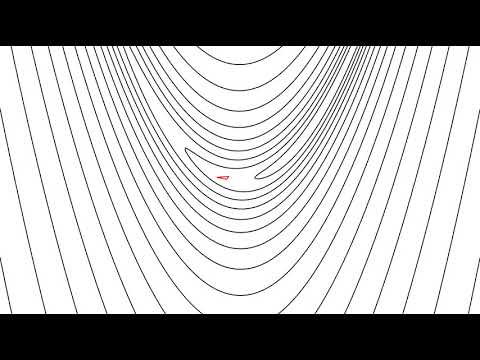

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('KEGSLQ6TlBM', width=600, height=400)